In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U sentence-transformers
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=387ad5348b1694dd8e7e9b27de2069b3e9a032eb35538e2a57ab6e82af7c4204
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
import sklearn
import numpy as np
from glob import glob
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline

import string
from os import listdir
from nltk.corpus import stopwords
from pickle import dump

import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import sys

import os
from glob import glob
import itertools
from scipy.stats import zscore

### Graph imports ###
import matplotlib.pyplot as plt
from PIL import Image

### Audio import ###
import librosa
import IPython
from IPython.display import Audio

### Plot imports ###
from IPython.display import Image
import matplotlib.pyplot as plt

### Time Distributed ConvNet imports ###
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, SimpleRNN

from tensorflow.keras.layers import Input, Dense, Dropout, Activation, TimeDistributed, concatenate, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, LeakyReLU, Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import backend as K
from keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

import re
import glob

from sentence_transformers import SentenceTransformer
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

import keras
from IPython.display import clear_output


In [ ]:
pretrained_models_path = 'drive/MyDrive/ThesisData/pretrained_model/'
csebuetnlp_banglabert_path = pretrained_models_path + 'csebuetnlp_banglabert.pkl'
sagorsarker_bangla_bert_base_path = pretrained_models_path + 'sagorsarker_bangla-bert-base.pkl'
neuropark_sahajBERT_path = pretrained_models_path + 'neuropark_sahajBERT.pkl'

em_b_path_1 = 'drive/MyDrive/RacismPaper/Dataset/wordEmbedding/binary/em_1'
em_b_path_2 = 'drive/MyDrive/RacismPaper/Dataset/wordEmbedding/binary/em_2'
em_b_path_3 = 'drive/MyDrive/RacismPaper/Dataset/wordEmbedding/binary/em_3'

em_m_path_1 = 'drive/MyDrive/RacismPaper/Dataset/wordEmbedding/multiclass/em_1'
em_m_path_2 = 'drive/MyDrive/RacismPaper/Dataset/wordEmbedding/multiclass/em_2'
em_m_path_3 = 'drive/MyDrive/RacismPaper/Dataset/wordEmbedding/multiclass/em_3'

corpus_b_path = 'drive/MyDrive/RacismPaper/dataset_b.csv'
corpus_m_path = 'drive/MyDrive/RacismPaper/dataset_m.csv'

dataset_binary_path = 'drive/MyDrive/RacismPaper/Dataset/augmented_data/real_aug_corpus_binary.csv'
dataset_multi_path = 'drive/MyDrive/RacismPaper/Dataset/augmented_data/real_aug_corpus_multi.csv'

result_binary_path = "drive/MyDrive/RacismPaper/Dataset/result_binary.xlsx"
result_multi_path = 'drive/MyDrive/RacismPaper/Dataset/result_multi.xlsx'


model_RNN_em1_path = 'drive/MyDrive/RacismPaper/Models/cseBuetBert/model_RNN.pth'
model_LSTM_em1_path = 'drive/MyDrive/RacismPaper/Models/cseBuetBert/model_LSTM.pth'
model_MCNNLSTM_em1_path = 'drive/MyDrive/RacismPaper/Models/cseBuetBert/'

model_RNN_em2_path = 'drive/MyDrive/RacismPaper/Models/sagorBert/'
model_LSTM_em2_path = 'drive/MyDrive/RacismPaper/Models/sagorBert/'
model_MCNNLSTM_em2_path = 'drive/MyDrive/RacismPaper/Models/sagorBert/'


model_RNN_em3_path = 'drive/MyDrive/RacismPaper/Models/sahajBert/model_RNN.pth'
model_LSTM_em3_path = 'drive/MyDrive/RacismPaper/Models/sahajBert/model_LSTM.pth'
model_MCNNLSTM_em3_path = 'drive/MyDrive/RacismPaper/Models/sahajBert/'

In [ ]:
def predictive_entropy(predictions):
    epsilon = sys.float_info.min
    predictive_entropy = -np.sum( np.mean(predictions, axis=0) * np.log(np.mean(predictions, axis=0) + epsilon),
            axis=-1)

    return predictive_entropy

target_names = ['Non-Racism', 'Racism']


In [ ]:

import matplotlib.pyplot as plt
from IPython.display import clear_output
import keras

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {'accuracy': [], 'loss': [], 'val_accuracy': [], 'val_loss': []}

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in self.metrics.keys():
            if metric in logs:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric].append(None)

        # Plotting
        f, ax = plt.subplots(figsize=(10, 5))
        clear_output(wait=True)

        # Training and Validation Accuracy
        ax.plot(range(1, epoch + 2), self.metrics['accuracy'], label='Training Accuracy', color='blue')
        ax.plot(range(1, epoch + 2), self.metrics['val_accuracy'], label='Validation Accuracy', color='orange')

        # Training and Validation Loss
        ax.plot(range(1, epoch + 2), self.metrics['loss'], label='Training Loss', color='green')
        ax.plot(range(1, epoch + 2), self.metrics['val_loss'], label='Validation Loss', color='red')

        ax.set_xlabel('Epochs')
        ax.set_ylabel('Metrics')
        ax.legend()
        ax.grid()

        plt.tight_layout()
        plt.show()


## Binary

## Bangla BERT (CSE BUET)

dataset_b.shape: 6815 768
Iteration: 1000. Loss: 0.40366363525390625. Accuracy: 81.39706% F1: 80.88% cohen_kappa: 62.8189
Iteration: 2000. Loss: 0.33495011925697327. Accuracy: 82.79412% F1: 81.75% cohen_kappa: 64.2088
Iteration: 3000. Loss: 0.6757181286811829. Accuracy: 74.77941% F1: 80.87% cohen_kappa: 59.2650
Iteration: 4000. Loss: 0.42393213510513306. Accuracy: 82.35294% F1: 81.11% cohen_kappa: 60.6326
Iteration: 5000. Loss: 0.41329821944236755. Accuracy: 83.67647% F1: 81.92% cohen_kappa: 61.9642
Iteration: 6000. Loss: 0.3400963544845581. Accuracy: 84.04412% F1: 82.37% cohen_kappa: 62.9815
Iteration: 7000. Loss: 0.45792850852012634. Accuracy: 83.38235% F1: 82.60% cohen_kappa: 63.5189
Iteration: 8000. Loss: 0.32583102583885193. Accuracy: 84.26471% F1: 82.87% cohen_kappa: 64.1427
Iteration: 9000. Loss: 0.3896162211894989. Accuracy: 84.41176% F1: 83.18% cohen_kappa: 64.6572
Binary Cse-Buet RNN Adam Accuracy:  84.41176470588235 F1 Score:  83.17895228458005 CohenKappa:  64.657202669109 U

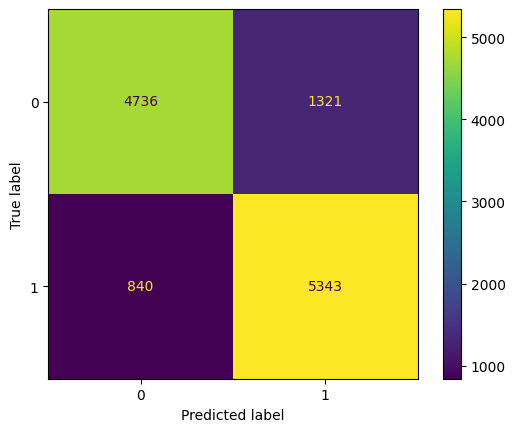

In [ ]:
#@title RNN
dataset_b = pd.read_csv(em_b_path_1)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 5)
predictions = []

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model_RNN = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model_RNN.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_RNN.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
mx_f1 = 0
mx_cohenKappa = 0
y_score_pos = []
y_score_neg = []
y_pred_b_rnn = []
y_true = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model_RNN(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            pos_probs = []
            neg_probs = []

            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model_RNN(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Total number of labels
                total += labels.size(0)

                y_pred_b_rnn.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1 = f1_score(y_true,y_pred_b_rnn,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred_b_rnn) * 100

            if mx_acc < accuracy:
              mx_acc = accuracy
              mx_f1 = f1
              mx_cohenKappa = cohen_kappa
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            #plt_data_balanced.append(('RNN-UNI',iter,'Adam',loss.item()))


# plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'RNN-UNI','Adam'))

uncertainity = predictive_entropy(predictions)


ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred_b_rnn)

print("Binary", "Cse-Buet", "RNN", "Adam", "Accuracy: ", mx_acc, "F1 Score: ", mx_f1, "CohenKappa: ", mx_cohenKappa, "Uncertainity: ", uncertainity)
print(classification_report(y_true, y_pred_b_rnn, target_names=target_names))
plt.show()
torch.save({
    'model_state_dict': model_RNN.state_dict(),
}, model_RNN_em1_path)

dataset_b.shape: 6815 768
Iteration: 1000. Loss: 0.3860575556755066. Accuracy: 81.25000% F1: 82.21% cohen_kappa: 62.4625
Iteration: 2000. Loss: 0.32957297563552856. Accuracy: 81.83824% F1: 81.80% cohen_kappa: 63.0815
Iteration: 3000. Loss: 0.3364632725715637. Accuracy: 82.05882% F1: 82.64% cohen_kappa: 63.3950
Iteration: 4000. Loss: 0.4522351622581482. Accuracy: 83.75000% F1: 82.91% cohen_kappa: 64.4231
Iteration: 5000. Loss: 0.43446072936058044. Accuracy: 83.82353% F1: 83.35% cohen_kappa: 65.0573
Iteration: 6000. Loss: 0.42907553911209106. Accuracy: 84.63235% F1: 83.62% cohen_kappa: 65.7567
Iteration: 7000. Loss: 0.3372749090194702. Accuracy: 84.26471% F1: 83.83% cohen_kappa: 66.1483
Iteration: 8000. Loss: 0.7017849087715149. Accuracy: 84.33824% F1: 84.05% cohen_kappa: 66.4577
Iteration: 9000. Loss: 0.6961868405342102. Accuracy: 84.55882% F1: 84.13% cohen_kappa: 66.7527
Uncertainity: 0.6930815
Binary Cse-Buet LSTM Adam Accuracy:  84.63235294117646 F1 Score:  83.61886881013847 CohenKap

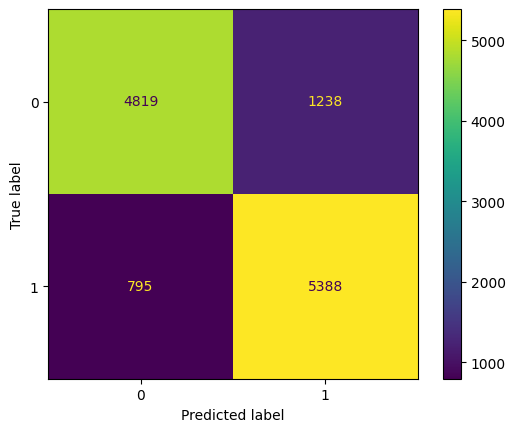

              precision    recall  f1-score   support

  Non-Racism       0.86      0.80      0.83      6057
      Racism       0.81      0.87      0.84      6183

    accuracy                           0.83     12240
   macro avg       0.84      0.83      0.83     12240
weighted avg       0.84      0.83      0.83     12240



In [ ]:
#@title LSTM
dataset_b = pd.read_csv(em_b_path_1)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 5)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.shape)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model_LSTM = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model_LSTM.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_LSTM.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
mx_f1 = 0
mx_cohenKappa = 0
y_pred_b_lstm = []
y_true = []
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        # print(images.shape)

        outputs = model_LSTM(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):
                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model_LSTM(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Total number of labels
                total += labels.size(0)

                y_pred_b_lstm.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred_b_lstm,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred_b_lstm) * 100

            if mx_acc < accuracy:
                mx_acc = accuracy
                mx_f1 = f1
                mx_cohenKappa = cohen_kappa
                y_score_pos = pos_probs
                y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            #plt_data_balanced.append(('LSTM-UNI',iter,'Adam',loss.item()))


# plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','Adam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)


ConfusionMatrixDisplay.from_predictions(y_true, y_pred_b_lstm)
print("Binary", "Cse-Buet", "LSTM", "Adam", "Accuracy: ", mx_acc, "F1 Score: ", mx_f1, "CohenKappa: ", mx_cohenKappa, "Uncertainity: ", uncertainity)

plt.show()
print(classification_report(y_true, y_pred_b_lstm, target_names=target_names))

torch.save({
    'model_state_dict': model_LSTM.state_dict(),
}, model_LSTM_em1_path)



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 24)]             0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 32, 24)]             0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 32, 24)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 29, 32)               3104      ['input_1[0][0]']             
                                                                                              

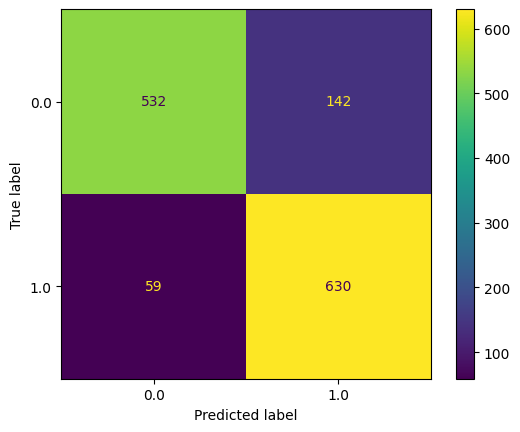

              precision    recall  f1-score   support

  Non-Racism       0.90      0.79      0.84       674
      Racism       0.82      0.91      0.86       689

    accuracy                           0.85      1363
   macro avg       0.86      0.85      0.85      1363
weighted avg       0.86      0.85      0.85      1363



In [ ]:
#@title MCNNLSTM
dataset_b = pd.read_csv(em_b_path_1)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
# data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
# data_Y = torch.from_numpy(data_Y)

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=5)

# define the model
def define_model(dim1, dim2):
	# channel 1
	input1 = Input(shape=(dim1, dim2))
	# embedding_layer_1 = embedding_layer(input1)

	conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(input1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D(pool_size=2)(drop1)
	flat1 = Flatten()(pool1)

	# channel 2
	input2 = Input(shape=(dim1, dim2))
	# embedding_layer_2 = embedding_layer(input2)
	conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(input2)
	drop2 = Dropout(0.5)(conv2)
	pool2 = MaxPooling1D(pool_size=2)(drop2)
	flat2 = Flatten()(pool2)

	# channel 3
	input3 = Input(shape=(dim1, dim2))
	# embedding_layer_3 = embedding_layer(input3)
	conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(input3)
	drop3 = Dropout(0.5)(conv3)
	pool3 = MaxPooling1D(pool_size=2)(drop3)
	flat3 = Flatten()(pool3)

	# merge
	CNN_layer = concatenate([flat1, flat2, flat3])

	# LSTM
	# x = embedding_layer(input3)
	LSTM_layer = LSTM(128)(input3)

	CNN_LSTM_layer = concatenate([LSTM_layer, CNN_layer])

	# interpretation
	dense1 = Dense(10, activation='relu')(CNN_LSTM_layer)
	outputs = Dense(1, activation='sigmoid')(dense1)
	model = Model(inputs=[input1, input2, input3], outputs=outputs)

	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

	# summarize
	print(model.summary())

	return model


# define model
model_MCNNLSTM = define_model(32, 24)

# fit model
X_train = X_train.reshape(5452, 32, 24)
model_MCNNLSTM.fit([X_train,X_train,X_train], y_train, epochs=10, batch_size=10)

X_test = X_test.reshape(1363, 32, 24)
model_MCNNLSTM.evaluate([X_test, X_test, X_test], y_test, batch_size=10)

# Make predictions on the test data
y_pred = model_MCNNLSTM.predict([X_test, X_test, X_test], batch_size=10)
# y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

predictions = y_pred

y_pred_b_mcnnlstm = y_pred.round()


f1 = f1_score(y_test,y_pred_b_mcnnlstm,zero_division='warn') * 100
cohen_kappa = cohen_kappa_score(y_test, y_pred_b_mcnnlstm) * 100
acc = accuracy_score(y_test, y_pred_b_mcnnlstm)
ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred_b_mcnnlstm)

uncertainity = predictive_entropy(predictions)


print('accuracy: {:.2f}, f1: {:.2f}, cohen_kappa: {:.4f}, Uncertainity: {:.2f}'.format(acc, f1, cohen_kappa, uncertainity))

plt.show()
print(classification_report(y_test, y_pred_b_mcnnlstm, target_names=target_names))

tf.keras.models.save_model(model_MCNNLSTM, model_MCNNLSTM_em1_path)


136/136 [==============================] - 0s 3ms/step
accuracy: 0.85, f1: 85.22, cohen_kappa: 69.5212, uncertainity: 0.3379


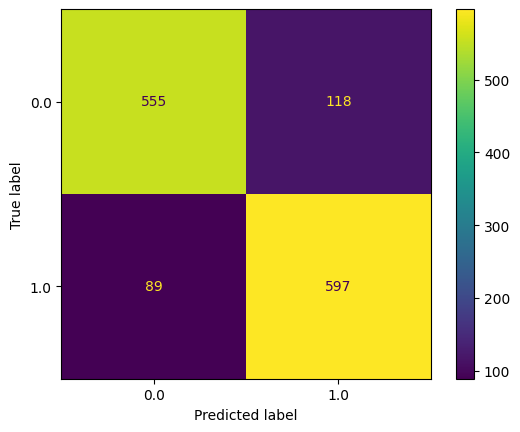

              precision    recall  f1-score   support

  Non-Racism       0.86      0.82      0.84       673
      Racism       0.83      0.87      0.85       686

    accuracy                           0.85      1359
   macro avg       0.85      0.85      0.85      1359
weighted avg       0.85      0.85      0.85      1359



In [ ]:
#@title Result

dataset_b = pd.read_csv(em_b_path_1)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]

data_Y = dataset_b[:,-1]


X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=5)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 5)
test_data = test_data[:-1]
X_test = test_data[:,:-1]
y_test = test_data[:, -1]


for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)

pred1 = np.array([])
pred2 = np.array([])
# Forward passes
with torch.no_grad():
    for (images, labels) in test_loader:
      images = images.reshape(batch_size, sequence_length, input_size).to(device)

      output1 = model_RNN(images.float())
      _, output1 = torch.max(output1, 1)
      output1 = output1.detach().cpu().numpy()
      pred1 = np.concatenate((pred1, output1.flatten()), axis=0)

      output2 = model_LSTM(images.float())
      _, output2 = torch.max(output2, 1)
      output2 = output2.detach().cpu().numpy()
      pred2 = np.concatenate((pred2, output2.flatten()), axis=0)

X_test = X_test[:-3]
y_test = y_test[:-3]
X_test = X_test.reshape(1359, 32, 24)
output3 = model_MCNNLSTM.predict([X_test, X_test, X_test], batch_size=10).flatten()
pred1 = pred1[:-1]
pred2 = pred2[:-1]
# Combine predictions (averaging in this example)
ensemble_predictions = (output3 + pred1 + pred2) / 3

threshold = 0.5  # Adjust this threshold as needed
predicted_labels = (ensemble_predictions > threshold).astype(np.int32)

# Compute confusion matrix
ConfusionMatrixDisplay.from_predictions(
   y_test, predicted_labels)


f1 = f1_score(y_test, predicted_labels,zero_division='warn') * 100
cohen_kappa = cohen_kappa_score(y_test, predicted_labels) * 100
acc = accuracy_score(y_test, predicted_labels)
uncertainity = predictive_entropy(predicted_labels)
print('accuracy: {:.2f}, f1: {:.2f}, cohen_kappa: {:.4f}, uncertainity: {:.4f}'.format(acc, f1, cohen_kappa, uncertainity))

plt.show()
print(classification_report(y_test, predicted_labels, target_names=target_names))


# Sagor BERT

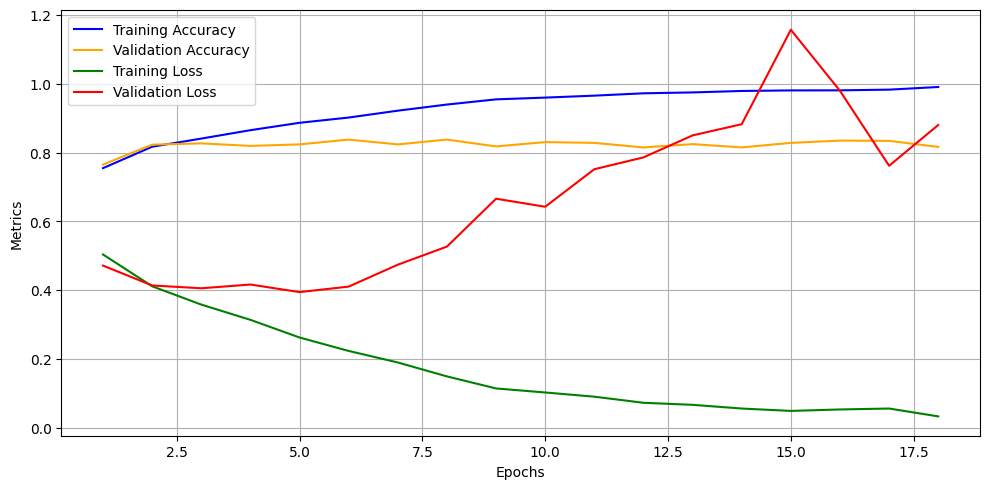

137/137 [==============================] - 1s 3ms/step
accuracy: 0.82, f1: 83.40, cohen_kappa: 63.2358, Uncertainity: 0.31


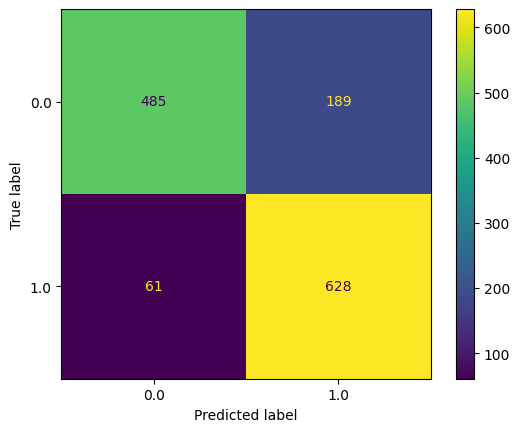

              precision    recall  f1-score   support

  Non-Racism       0.89      0.72      0.80       674
      Racism       0.77      0.91      0.83       689

    accuracy                           0.82      1363
   macro avg       0.83      0.82      0.81      1363
weighted avg       0.83      0.82      0.81      1363



In [ ]:
#@title RNN
dataset_b = pd.read_csv(em_b_path_2)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
# data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
# data_Y = torch.from_numpy(data_Y)

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=5)


def define_model(timesteps, input_dim):

  # Create a Sequential model
  model = Sequential()

  # Add a SimpleRNN layer as the input layer (you can change the number of units)
  model.add(SimpleRNN(units=512, activation='relu', input_shape=(timesteps, input_dim)))

  # Add four more Dense layers
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))

  # Output layer (change the number of units and activation function as needed)
  model.add(Dense(1, activation='sigmoid'))

  # Compile the model (choose an appropriate optimizer, loss function, and metrics)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  # Print the model summary
  print(model.summary())

  return model

# define model|
model_RNN = define_model(1, 768)
callbacks_list = [PlotLearning()]
# fit model
X_train = X_train.reshape(5452, 1, 768)
X_test = X_test.reshape( 1363, 1, 768)
model_RNN.fit(X_train, y_train, epochs=18, batch_size=10, callbacks=callbacks_list,validation_data=(X_test, y_test))

model_RNN.evaluate(X_test, y_test, batch_size=10)

# Make predictions on the test data
y_pred = model_RNN.predict(X_test, batch_size=10)
# y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

predictions = y_pred

y_pred_b_rnn = y_pred.round()


f1 = f1_score(y_test,y_pred_b_rnn,zero_division='warn') * 100
cohen_kappa = cohen_kappa_score(y_test, y_pred_b_rnn) * 100
acc = accuracy_score(y_test, y_pred_b_rnn)

ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred_b_rnn)


uncertainity = predictive_entropy(predictions)
print('accuracy: {:.2f}, f1: {:.2f}, cohen_kappa: {:.4f}, Uncertainity: {:.2f}'.format(acc, f1, cohen_kappa, uncertainity))

plt.show()
print(classification_report(y_test, y_pred_b_rnn, target_names=target_names))

tf.keras.models.save_model(model_RNN, model_RNN_em2_path)

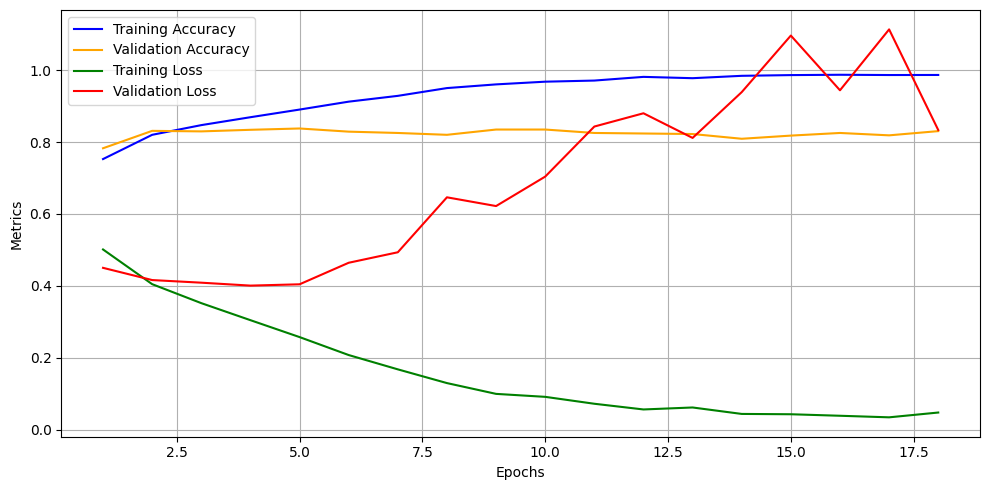

137/137 [==============================] - 0s 2ms/step
accuracy: 0.83, f1: 83.65, cohen_kappa: 66.0809, Uncertainity: 0.34


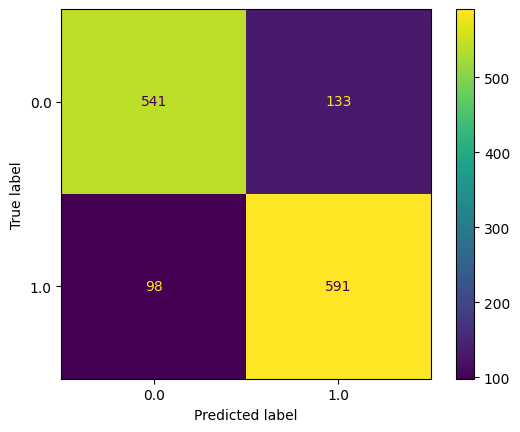

              precision    recall  f1-score   support

  Non-Racism       0.89      0.72      0.80       674
      Racism       0.77      0.91      0.83       689

    accuracy                           0.82      1363
   macro avg       0.83      0.82      0.81      1363
weighted avg       0.83      0.82      0.81      1363



In [ ]:
#@title LSTM
dataset_b = pd.read_csv(em_b_path_2)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
# data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
# data_Y = torch.from_numpy(data_Y)

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=5)


def define_model(timesteps, input_dim):

  # Create a Sequential model
  model = Sequential()

  # Add a SimpleRNN layer as the input layer (you can change the number of units)
  model.add(LSTM(units=512, activation='relu', input_shape=(timesteps, input_dim)))

  # Add four more Dense layers
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))

  # Output layer (change the number of units and activation function as needed)
  model.add(Dense(1, activation='sigmoid'))

  # Compile the model (choose an appropriate optimizer, loss function, and metrics)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  # Print the model summary
  print(model.summary())

  return model

# define model|
model_LSTM = define_model(1, 768)
callbacks_list = [PlotLearning()]
# fit model
X_train = X_train.reshape(5452, 1, 768)
X_test = X_test.reshape( 1363, 1, 768)
model_LSTM.fit(X_train, y_train, epochs=18, batch_size=10, callbacks=callbacks_list,validation_data=(X_test, y_test))

model_LSTM.evaluate(X_test, y_test, batch_size=10)

# Make predictions on the test data
y_pred = model_LSTM.predict(X_test, batch_size=10)
# y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

predictions = y_pred

y_pred_b_lstm = y_pred.round()


f1 = f1_score(y_test,y_pred_b_lstm,zero_division='warn') * 100
cohen_kappa = cohen_kappa_score(y_test, y_pred_b_lstm) * 100
acc = accuracy_score(y_test, y_pred_b_lstm)

ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred_b_lstm)


uncertainity = predictive_entropy(predictions)
print('accuracy: {:.2f}, f1: {:.2f}, cohen_kappa: {:.4f}, Uncertainity: {:.2f}'.format(acc, f1, cohen_kappa, uncertainity))

plt.show()
print(classification_report(y_test, y_pred_b_rnn, target_names=target_names))

tf.keras.models.save_model(model_RNN, model_LSTM_em2_path)


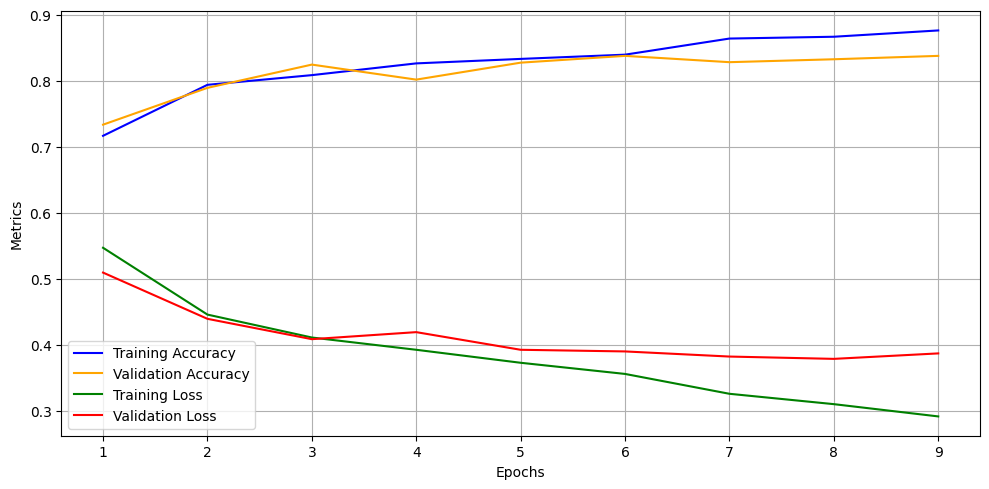

137/137 [==============================] - 1s 3ms/step
accuracy: 0.84, f1: 83.57, cohen_kappa: 67.5849, Uncertainity: 0.35


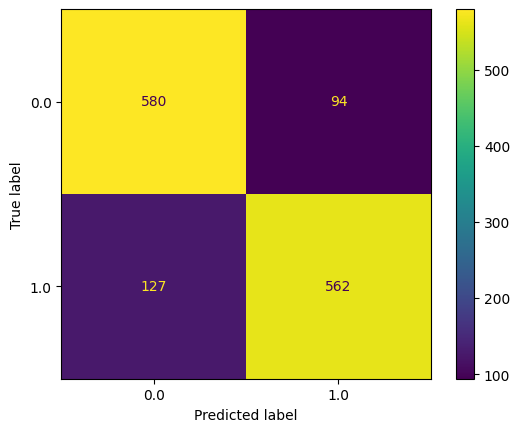

              precision    recall  f1-score   support

  Non-Racism       0.82      0.86      0.84       674
      Racism       0.86      0.82      0.84       689

    accuracy                           0.84      1363
   macro avg       0.84      0.84      0.84      1363
weighted avg       0.84      0.84      0.84      1363



In [ ]:
#@title MCNNLSTM
dataset_b = pd.read_csv(em_b_path_2)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
# data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
# data_Y = torch.from_numpy(data_Y)

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=5)

# define the model
def define_model(dim1, dim2):
	# channel 1
	input1 = Input(shape=(dim1, dim2))
	# embedding_layer_1 = embedding_layer(input1)

	conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(input1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D(pool_size=2)(drop1)
	flat1 = Flatten()(pool1)

	# channel 2
	input2 = Input(shape=(dim1, dim2))
	# embedding_layer_2 = embedding_layer(input2)
	conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(input2)
	drop2 = Dropout(0.5)(conv2)
	pool2 = MaxPooling1D(pool_size=2)(drop2)
	flat2 = Flatten()(pool2)

	# channel 3
	input3 = Input(shape=(dim1, dim2))
	# embedding_layer_3 = embedding_layer(input3)
	conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(input3)
	drop3 = Dropout(0.5)(conv3)
	pool3 = MaxPooling1D(pool_size=2)(drop3)
	flat3 = Flatten()(pool3)

	# merge
	CNN_layer = concatenate([flat1, flat2, flat3])

	# LSTM
	# x = embedding_layer(input3)
	LSTM_layer = LSTM(128)(input3)

	CNN_LSTM_layer = concatenate([LSTM_layer, CNN_layer])

	# interpretation
	dense1 = Dense(10, activation='relu')(CNN_LSTM_layer)
	outputs = Dense(1, activation='sigmoid')(dense1)
	model = Model(inputs=[input1, input2, input3], outputs=outputs)

	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

	# summarize
	print(model.summary())

	return model


# define model
model_MCNNLSTM = define_model(32, 24)
callbacks_list = [PlotLearning()]
# fit model
X_train = X_train.reshape(5452, 32, 24)
X_test = X_test.reshape(1363, 32, 24)
model_MCNNLSTM.fit([X_train,X_train,X_train], y_train, epochs=9, batch_size=10, callbacks=callbacks_list,validation_data=([X_test, X_test, X_test], y_test))

model_MCNNLSTM.evaluate([X_test, X_test, X_test], y_test, batch_size=10)

# Make predictions on the test data
y_pred = model_MCNNLSTM.predict([X_test, X_test, X_test], batch_size=10)
# y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

predictions = y_pred

y_pred_b_mcnnlstm = y_pred.round()


f1 = f1_score(y_test,y_pred_b_mcnnlstm,zero_division='warn') * 100
cohen_kappa = cohen_kappa_score(y_test, y_pred_b_mcnnlstm) * 100
acc = accuracy_score(y_test, y_pred_b_mcnnlstm)

ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred_b_mcnnlstm)


uncertainity = predictive_entropy(predictions)
print('accuracy: {:.2f}, f1: {:.2f}, cohen_kappa: {:.4f}, Uncertainity: {:.2f}'.format(acc, f1, cohen_kappa, uncertainity))

plt.show()
print(classification_report(y_test, y_pred_b_mcnnlstm, target_names=target_names))

tf.keras.models.save_model(model_MCNNLSTM, model_MCNNLSTM_em2_path)


136/136 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

  Non-Racism       0.88      0.79      0.83       673
      Racism       0.81      0.89      0.85       686

    accuracy                           0.84      1359
   macro avg       0.85      0.84      0.84      1359
weighted avg       0.84      0.84      0.84      1359

accuracy: 0.84, f1: 85.04, cohen_kappa: 68.3272, uncertainity: 0.3278


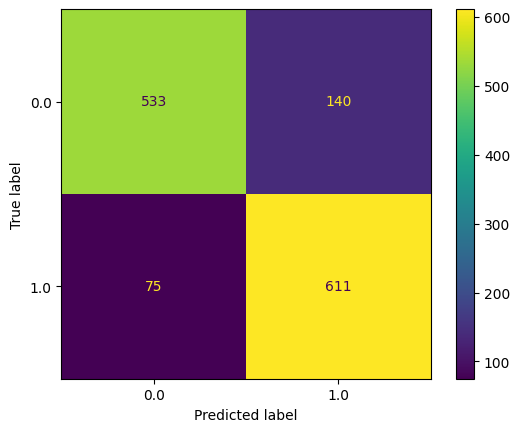

In [ ]:
#@title Result

dataset_b = pd.read_csv(em_b_path_2)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]

data_Y = dataset_b[:,-1]


X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=5)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 5)
test_data = test_data[:-1]
X_test = test_data[:,:-1]
y_test = test_data[:, -1]


for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)
pred1 = np.array([])
pred2 = np.array([])

# Forward passes
# with torch.no_grad():
#     for (images, labels) in test_loader:
#       images = images.reshape(batch_size, sequence_length, input_size).to(device)

#       output1 = model_RNN(images)
#       _, output1 = torch.max(output1, 1)
#       output1 = output1.detach().cpu().numpy()
#       pred1 = np.concatenate((pred1, output1.flatten()), axis=0)

#       output2 = model_LSTM(images)
#       _, output2 = torch.max(output2, 1)
#       output2 = output2.detach().cpu().numpy()
#       pred2 = np.concatenate((pred2, output2.flatten()), axis=0)

X_test = X_test[:-3]
y_test = y_test[:-3]
X_test = X_test.reshape( 1359, 1, 768)

output1 = model_RNN.predict(X_test, batch_size=10).flatten()
output2 = model_LSTM.predict(X_test, batch_size = 10).flatten()
X_test = X_test.reshape(1359, 32, 24)
output3 = model_MCNNLSTM.predict([X_test, X_test, X_test], batch_size=10).flatten()

# pred1 = pred1[:-1]
# pred2 = pred2[:-1]
# Combine predictions (averaging in this example)
ensemble_predictions = (output3 + output2 + output1) / 3

threshold = 0.5  # Adjust this threshold as needed
predicted_labels = (ensemble_predictions > threshold).astype(np.int32)

# Compute confusion matrix
ConfusionMatrixDisplay.from_predictions(
   y_test, predicted_labels)
# Compute accuracy

f1 = f1_score(y_test, predicted_labels,zero_division='warn') * 100
cohen_kappa = cohen_kappa_score(y_test, predicted_labels) * 100
acc = accuracy_score(y_test, predicted_labels)
uncertainity = predictive_entropy(predicted_labels)
print(classification_report(y_test, predicted_labels, target_names=target_names))


print('accuracy: {:.2f}, f1: {:.2f}, cohen_kappa: {:.4f}, uncertainity: {:.4f}'.format(acc, f1, cohen_kappa, uncertainity))



# Sahaj BERT

dataset_b.shape: 6815 1024
Iteration: 1000. Loss: 0.4343443810939789. Accuracy: 84.48529% F1: 85.44% cohen_kappa: 68.9041
Iteration: 2000. Loss: 0.49177607893943787. Accuracy: 84.11765% F1: 84.48% cohen_kappa: 68.2183
Iteration: 3000. Loss: 0.39684998989105225. Accuracy: 83.52941% F1: 83.16% cohen_kappa: 67.0986
Iteration: 4000. Loss: 0.4109610617160797. Accuracy: 82.13235% F1: 81.03% cohen_kappa: 64.3569
Iteration: 5000. Loss: 0.41355881094932556. Accuracy: 84.55882% F1: 85.36% cohen_kappa: 69.0646
Iteration: 6000. Loss: 0.3187824487686157. Accuracy: 84.92647% F1: 85.73% cohen_kappa: 69.7986
Iteration: 7000. Loss: 0.5343211889266968. Accuracy: 82.57353% F1: 81.26% cohen_kappa: 65.2526
Iteration: 8000. Loss: 0.4147469997406006. Accuracy: 84.63235% F1: 85.85% cohen_kappa: 69.1746
Iteration: 9000. Loss: 0.31356287002563477. Accuracy: 85.00000% F1: 85.79% cohen_kappa: 69.9468
Uncertainity: 0.68808085
Binary Sahaj-bert RNN Adam Accuracy:  85.0 F1 Score:  85.79387186629526 CohenKappa:  69.9

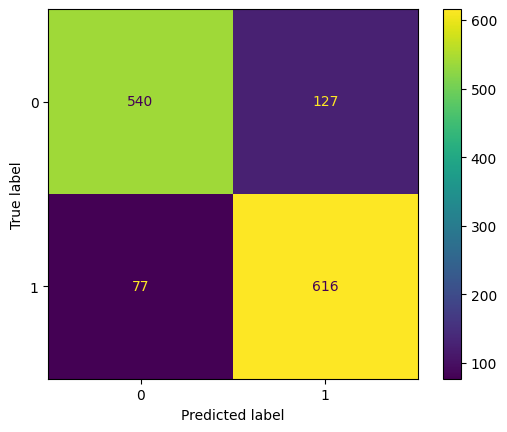

In [ ]:
#@title RNN

dataset_b = pd.read_csv(em_b_path_3)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model_RNN = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model_RNN.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_RNN.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
mx_f1 = 0
mx_cohenKappa = 0
y_score_pos = []
y_score_neg = []
predictions = []


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model_RNN(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred_b_rnn = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model_RNN(images.float())
                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred_b_rnn.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred_b_rnn, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred_b_rnn) * 100

            if mx_acc < accuracy:
              mx_acc = accuracy
              mx_f1 = f1
              mx_cohenKappa = cohen_kappa
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            #plt_data_balanced.append(('RNN-UNI',iter,'Adam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

# plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'RNN-UNI','Adam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)


ConfusionMatrixDisplay.from_predictions(y_true, y_pred_b_rnn)
print("Binary", "Sahaj-bert", "RNN", "Adam", "Accuracy: ", mx_acc, "F1 Score: ", mx_f1, "CohenKappa: ", mx_cohenKappa, "Uncertainity: ", uncertainity)
print(classification_report(y_true, y_pred_b_rnn, target_names=target_names))

plt.show()
torch.save({
    'model_state_dict': model_RNN.state_dict(),
}, model_RNN_em3_path)


dataset_b.shape: 6815 1024
Iteration: 1000. Loss: 0.49568429589271545. Accuracy: 82.05882% F1: 84.24% cohen_kappa: 63.9402
Iteration: 2000. Loss: 0.39575663208961487. Accuracy: 83.60294% F1: 82.91% cohen_kappa: 67.2685
Iteration: 3000. Loss: 0.5190486907958984. Accuracy: 84.92647% F1: 84.94% cohen_kappa: 69.8631
Iteration: 4000. Loss: 0.31383299827575684. Accuracy: 85.44118% F1: 86.19% cohen_kappa: 70.8323
Iteration: 5000. Loss: 0.578607976436615. Accuracy: 85.51471% F1: 86.12% cohen_kappa: 70.9919
Iteration: 6000. Loss: 0.4100620150566101. Accuracy: 85.58824% F1: 85.69% cohen_kappa: 71.1789
Iteration: 7000. Loss: 0.41591987013816833. Accuracy: 84.92647% F1: 84.48% cohen_kappa: 69.8969
Iteration: 8000. Loss: 0.4140172004699707. Accuracy: 86.25000% F1: 86.54% cohen_kappa: 72.4876
Iteration: 9000. Loss: 0.5091121792793274. Accuracy: 81.83824% F1: 80.16% cohen_kappa: 63.8067
Uncertainity: 0.6767899
Binary Sahaj-bert LSTM Adam Accuracy:  86.25 F1 Score:  86.53707703383729 CohenKappa:  72.4

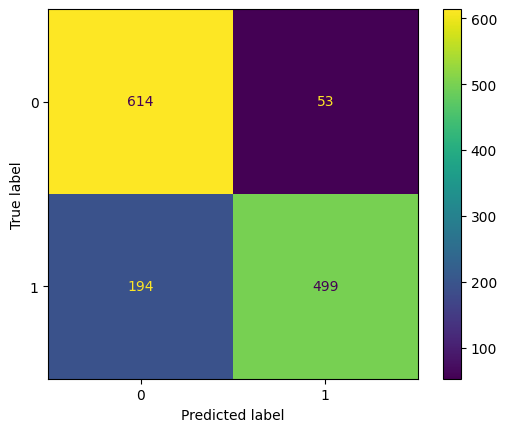

In [ ]:
#@title LSTM

dataset_b = pd.read_csv(em_b_path_3)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model_LSTM = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model_LSTM.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_LSTM.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
mx_f1 = 0
mx_cohenKappa = 0
iterwise_acc = []
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model_LSTM(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred_b_lstm = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model_LSTM(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
                # print(predicted.shape)

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())


                # Total number of labels
                total += labels.size(0)

                y_pred_b_lstm.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred_b_lstm,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred_b_lstm) * 100

            if mx_acc < accuracy:
                mx_acc = accuracy
                mx_f1 = f1
                mx_cohenKappa = cohen_kappa
                y_score_pos = pos_probs
                y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            #plt_data_balanced.append(('LSTM-UNI',iter,'Adam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

# plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','Adam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred_b_lstm)
print("Binary", "Sahaj-bert", "LSTM", "Adam", "Accuracy: ", mx_acc, "F1 Score: ", mx_f1, "CohenKappa: ", mx_cohenKappa, "Uncertainity: ", uncertainity)
print(classification_report(y_true, y_pred_b_lstm, target_names=target_names))

plt.show()
torch.save({
    'model_state_dict': model_LSTM.state_dict(),
}, model_LSTM_em3_path)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 32, 32)]             0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 32, 32)]             0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 32, 32)]             0         []                            
                                                                                                  
 conv1d_3 (Conv1D)           (None, 29, 32)               4128      ['input_4[0][0]']             
                                                                                            

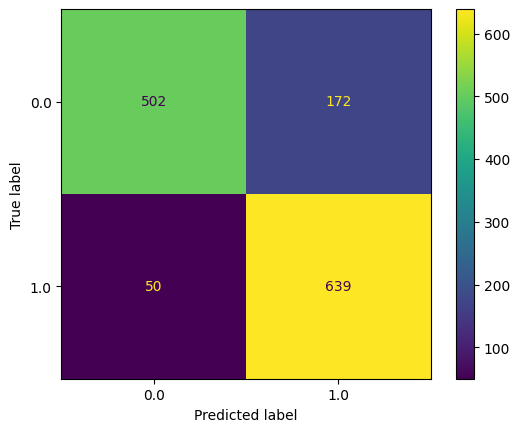

In [ ]:
#@title MCNNLSTM
dataset_b = pd.read_csv(em_b_path_3)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
# data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
# data_Y = torch.from_numpy(data_Y)

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=5)

# define the model
def define_model(dim1, dim2):
	# channel 1
	input1 = Input(shape=(dim1, dim2))
	# embedding_layer_1 = embedding_layer(input1)

	conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(input1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D(pool_size=2)(drop1)
	flat1 = Flatten()(pool1)

	# channel 2
	input2 = Input(shape=(dim1, dim2))
	# embedding_layer_2 = embedding_layer(input2)
	conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(input2)
	drop2 = Dropout(0.5)(conv2)
	pool2 = MaxPooling1D(pool_size=2)(drop2)
	flat2 = Flatten()(pool2)

	# channel 3
	input3 = Input(shape=(dim1, dim2))
	# embedding_layer_3 = embedding_layer(input3)
	conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(input3)
	drop3 = Dropout(0.5)(conv3)
	pool3 = MaxPooling1D(pool_size=2)(drop3)
	flat3 = Flatten()(pool3)

	# merge
	CNN_layer = concatenate([flat1, flat2, flat3])

	# LSTM
	# x = embedding_layer(input3)
	LSTM_layer = LSTM(128)(input3)

	CNN_LSTM_layer = concatenate([LSTM_layer, CNN_layer])

	# interpretation
	dense1 = Dense(10, activation='relu')(CNN_LSTM_layer)
	outputs = Dense(1, activation='sigmoid')(dense1)
	model = Model(inputs=[input1, input2, input3], outputs=outputs)

	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

	# summarize
	print(model.summary())

	return model


# define model
model_MCNNLSTM = define_model(32, 32)

# fit model
X_train = X_train.reshape(5452, 32, 32)
model_MCNNLSTM.fit([X_train,X_train,X_train], y_train, epochs=10, batch_size=10)

X_test = X_test.reshape(1363, 32, 32)
model_MCNNLSTM.evaluate([X_test, X_test, X_test], y_test, batch_size=10)

# Make predictions on the test data
y_pred = model_MCNNLSTM.predict([X_test, X_test, X_test], batch_size=10)
# y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

predictions = y_pred

y_pred_b_mcnnlstm = y_pred.round()


f1 = f1_score(y_test,y_pred_b_mcnnlstm,zero_division='warn') * 100
cohen_kappa = cohen_kappa_score(y_test, y_pred_b_mcnnlstm) * 100
acc = accuracy_score(y_test, y_pred_b_mcnnlstm)

ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred_b_mcnnlstm)

uncertainity = predictive_entropy(predictions)

print('accuracy: {:.2f}, f1: {:.2f}, cohen_kappa: {:.4f}, Uncertainity: {:.2f}'.format(acc, f1, cohen_kappa, uncertainity))
tf.keras.models.save_model(model_MCNNLSTM, model_MCNNLSTM_em3_path)
print(classification_report(y_test, y_pred_b_mcnnlstm, target_names=target_names))


136/136 [==============================] - 1s 5ms/step
accuracy: 0.87, f1: 88.05, cohen_kappa: 74.2096, uncertainity: 0.3190


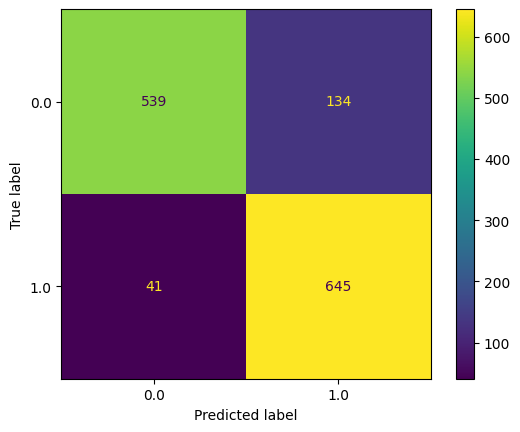

              precision    recall  f1-score   support

  Non-Racism       0.93      0.80      0.86       673
      Racism       0.83      0.94      0.88       686

    accuracy                           0.87      1359
   macro avg       0.88      0.87      0.87      1359
weighted avg       0.88      0.87      0.87      1359



In [ ]:
#@title Result
#@title Result

dataset_b = pd.read_csv(em_b_path_3)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]

data_Y = dataset_b[:,-1]


X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=5)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 5)
test_data = test_data[:-1]
X_test = test_data[:,:-1]
y_test = test_data[:, -1]


for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)

pred1 = np.array([])
pred2 = np.array([])
# Forward passes
with torch.no_grad():
    for (images, labels) in test_loader:
      images = images.reshape(batch_size, sequence_length, input_size).to(device)

      output1 = model_RNN(images.float())
      _, output1 = torch.max(output1, 1)
      output1 = output1.detach().cpu().numpy()
      pred1 = np.concatenate((pred1, output1.flatten()), axis=0)

      output2 = model_LSTM(images.float())
      _, output2 = torch.max(output2, 1)
      output2 = output2.detach().cpu().numpy()
      pred2 = np.concatenate((pred2, output2.flatten()), axis=0)

X_test = X_test[:-3]
y_test = y_test[:-3]
X_test = X_test.reshape(1359, 32, 32)
output3 = model_MCNNLSTM.predict([X_test, X_test, X_test], batch_size=10).flatten()
pred1 = pred1[:-1]
pred2 = pred2[:-1]
# Combine predictions (averaging in this example)
ensemble_predictions = (output3 + pred1 + pred2) / 3

threshold = 0.5  # Adjust this threshold as needed
predicted_labels = (ensemble_predictions > threshold).astype(np.int32)

# Compute confusion matrix
ConfusionMatrixDisplay.from_predictions(
   y_test, predicted_labels)

f1 = f1_score(y_test, predicted_labels,zero_division='warn') * 100
cohen_kappa = cohen_kappa_score(y_test, predicted_labels) * 100
acc = accuracy_score(y_test, predicted_labels)
uncertainity = predictive_entropy(predicted_labels)


print('accuracy: {:.2f}, f1: {:.2f}, cohen_kappa: {:.4f}, uncertainity: {:.4f}'.format(acc, f1, cohen_kappa, uncertainity))

plt.show()
print(classification_report(y_test, predicted_labels, target_names=target_names))
